In [17]:
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
df = pd.read_csv(os.path.join('data', 'train.csv'), index_col=0)
encs = {}
for col in ['Sex', 'Embarked']:
    encs[col] = LabelEncoder()
    df.loc[pd.isnull(df[col]), col]  = 'NaN'
    df[col] = encs[col].fit_transform(df[col])
    print(col, encs[col].classes_)

Sex ['female' 'male']
Embarked ['C' 'NaN' 'Q' 'S']


In [39]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,3
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,3
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,3


In [40]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,2.343434
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.167398
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [41]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.174963
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.197493
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.106395
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.039280
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.068043
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.032517
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.246359
Embarked,-0.174963,0.197493,0.106395,-0.039280,0.068043,0.032517,-0.246359,1.000000


C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


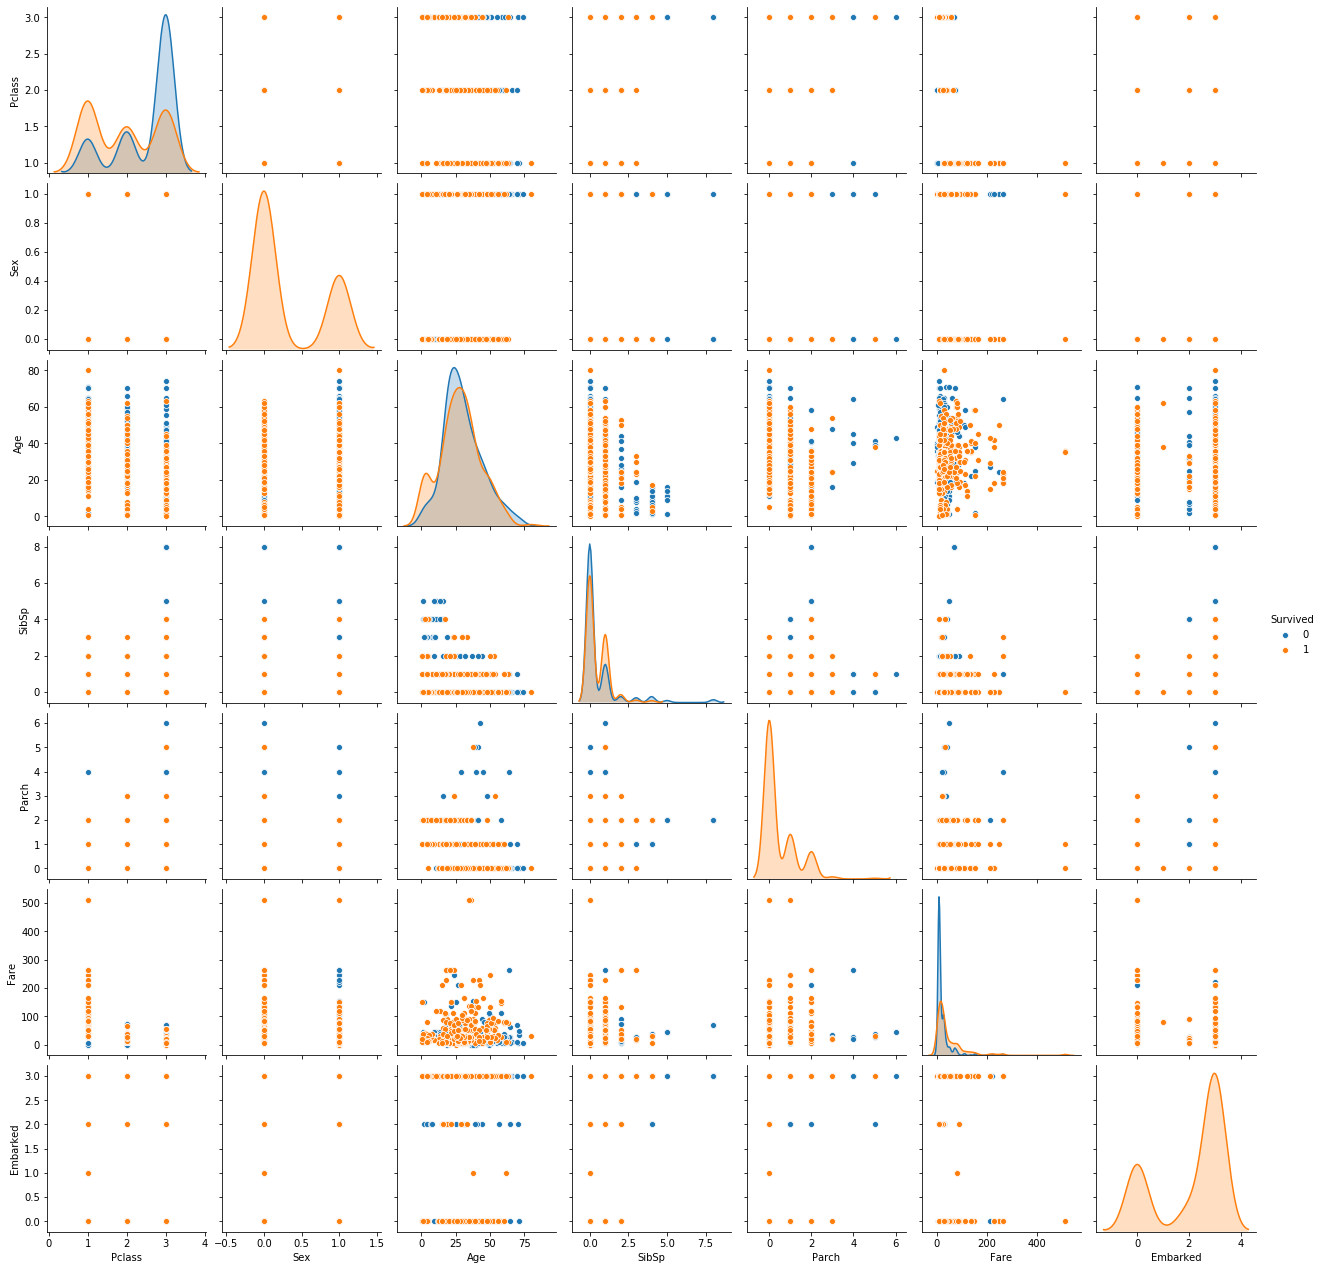

In [42]:
sns.pairplot(df, hue='Survived')